**How to Query the BigQuery Sample Tables (BigQuery Dataset)**

# Goal:

The goal of this notebook is to practice SQL using `bigquery-public-data:samples`. A helper is used to make sure that the Kaggle 5TB limit is not reached, so all focus can be on creating the queries to answer the posed questions.

In [1]:
import bq_helper
from bq_helper import BigQueryHelper

sampleTables = bq_helper.BigQueryHelper(active_project = 'bigquery-public-data', dataset_name = 'samples')

In [2]:
bq_assistant = BigQueryHelper("bigquery-public-data", "samples")
bq_assistant.list_tables()

['github_nested',
 'github_timeline',
 'gsod',
 'natality',
 'shakespeare',
 'trigrams',
 'wikipedia']

In [3]:
bq_assistant.head("gsod", num_rows=20)

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39800,99999,1929,12,11,45.500000,4,43.500000,4.0,981.400024,4.0,None,None,4.3,4,19.799999,4,29.900000,None,34.000000,False,None,None,NaN,None,False,False,False,False,False,False
1,37770,99999,1929,12,6,47.000000,4,41.299999,4.0,993.099976,4.0,None,None,4.3,4,14.300000,4,18.100000,None,45.000000,False,None,None,NaN,None,False,False,False,False,False,False
2,31590,99999,1929,12,6,45.799999,4,38.299999,4.0,974.500000,4.0,None,None,12.4,4,24.500000,4,36.900002,None,43.000000,False,None,None,0.00,None,False,False,False,False,False,False
3,30910,99999,1929,11,25,49.799999,4,NaN,NaN,986.500000,4.0,None,None,3.9,4,16.400000,4,23.900000,None,41.000000,False,None,None,0.04,None,False,False,False,False,False,False
4,33790,99999,1929,8,29,62.000000,4,56.299999,4.0,1015.599976,4.0,None,None,9.3,4,11.200000,4,18.100000,None,54.000000,False,None,None,0.00,None,False,False,False,False,False,False
5,38110,99999,1929,11,2,47.799999,4,44.000000,4.0,1027.900024,4.0,None,None,6.8,4,6.000000,4,13.000000,None,42.099998,False,None,None,NaN,None,False,False,False,False,False,False
6,33790,99999,1929,9,17,55.700001,4,52.799999,4.0,1021.799988,4.0,None,None,1.4,4,4.300000,4,5.100000,None,48.000000,False,None,None,0.00,None,True,True,True,True,True,True
7,30750,99999,1929,12,7,43.299999,4,41.799999,4.0,966.599976,4.0,None,None,6.2,4,12.500000,4,29.900000,None,42.099998,True,None,None,NaN,None,False,False,False,False,False,False
8,34970,99999,1929,8,26,62.599998,4,56.000000,4.0,1023.500000,4.0,None,None,5.9,4,11.000000,4,13.000000,None,59.000000,False,None,None,0.00,None,False,False,False,False,False,False
9,37770,99999,1929,12,19,36.000000,4,28.799999,4.0,1033.099976,4.0,None,None,1.9,4,8.200000,4,13.000000,None,30.000000,False,None,None,0.00,None,False,False,False,False,False,False


What is the mean temperature for each year in the dataset?

In [4]:
gsod_query = """
         SELECT year, AVG(mean_temp) AS mean_temp
         FROM `bigquery-public-data.samples.gsod`
         GROUP BY year
         ORDER BY year
         """
gsod_response = sampleTables.query_to_pandas_safe(gsod_query, max_gb_scanned=5)
gsod_response

,year,mean_temp
0,1929,49.238251
1,1930,49.857282
2,1931,49.614375
3,1932,49.819760
4,1933,44.924589
5,1934,45.345601
6,1935,49.250046
7,1936,47.513271
8,1937,44.559853
9,1938,50.786244


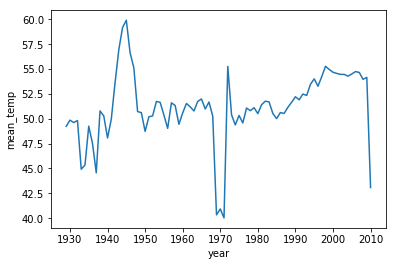

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x = 'year', y = 'mean_temp', data = gsod_response)

Which Wikipedia articles pertaining to "data" are on average the longest?

In [6]:
bq_assistant.head("wikipedia", num_rows=20)

,title,id,language,wp_namespace,is_redirect,revision_id,contributor_ip,contributor_id,contributor_username,timestamp,is_minor,is_bot,reversion_id,comment,num_characters
0,Unrestricted submarine warfare,586345,,0,None,287499025,189.62.134.178,None,None,1241292234,None,None,None,Intro; 3rd paragraph,9327
1,Hayden Panettiere,509997,,0,None,165149450,24.61.173.182,None,None,1192613507,None,None,None,/* Filmography */,12493
2,Strobe light,299593,,0,None,76592522,86.142.27.14,None,None,1158678369,None,None,None,/* Strobe lights and epilepsy */,3413
3,Still Crazy (film),2423947,,0,None,117645706,89.100.41.168,None,None,1174783823,None,None,None,/* Synopsis */,9685
4,List of television shows filmed in New York City,1999250,,0,None,335497479,69.204.107.73,None,None,1262459241,None,None,None,/* Shows filmed primarily on location and/or u...,4215
5,"Cerritos, California",107610,,0,None,7879735,68.5.202.234,None,None,1101154813,None,None,None,/* History */,18989
6,La Terremoto de Alcorcón,4194349,,0,None,298206665,88.114.122.161,None,None,1245792435,None,None,None,those aren't all parodies,3720
7,Carl Hamilton (fictional character),259107,,0,None,9342566,162.108.2.222,None,None,1104335860,None,None,None,/* Hamilton's life */,5633
8,Post Office Rifles,1108478,,0,None,250986329,81.187.153.189,None,None,1226360809,None,None,None,None,5460
9,Ian Taylor,10049232,,0,None,148679050,90.202.219.77,None,None,1186043154,None,None,None,None,322


In [7]:
wikipedia_query = """
                  SELECT title, AVG(num_characters) AS avg_characters
                  FROM `bigquery-public-data.samples.wikipedia`
                  WHERE LOWER(title) LIKE '%data%' AND title NOT LIKE '%:%' AND title NOT LIKE '%(%' AND title NOT LIKE '%)%'
                  GROUP BY title
                  ORDER BY avg_characters DESC
                  """

wikipedia_response = sampleTables.query_to_pandas_safe(wikipedia_query, max_gb_scanned = 10)
wikipedia_response

,title,avg_characters
0,IUCN Red List data deficient species,133257.900000
1,Microsoft Data Access Components,42412.635458
2,Comparison of relational database management s...,40985.924242
3,Crystallographic database,34090.683333
4,Oracle Database,33506.782051
5,List of terms relating to algorithms and data ...,30475.482587
6,List of Digimon Data Squad characters,30084.082157
7,Metadata,30010.041933
8,List of the vascular plants in the Red Data Bo...,29621.222222
9,Data Encryption Standard,27635.117500


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


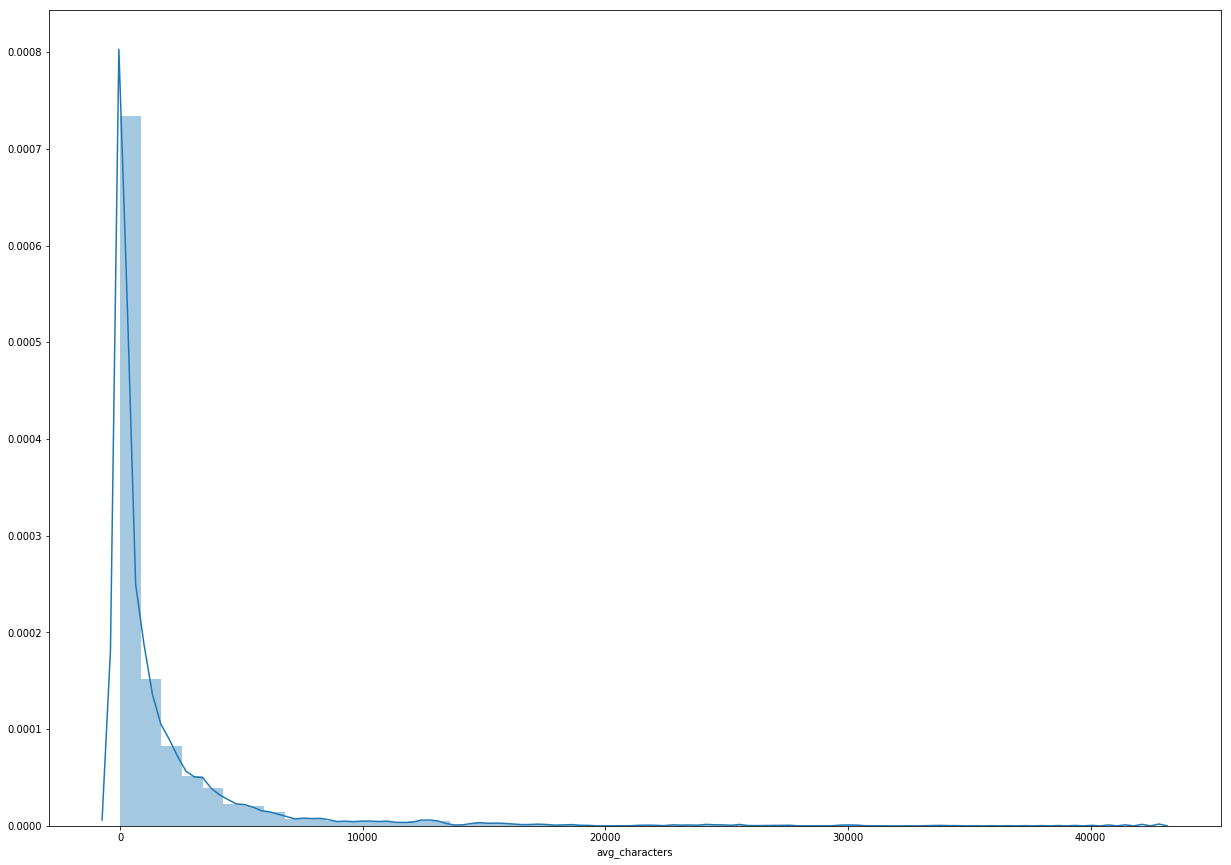

In [8]:
# remove first row because it is an outlier
wikipedia_response = wikipedia_response.tail(-1)

f, ax = plt.subplots(figsize = (21, 15))
sns.distplot(wikipedia_response['avg_characters'])

Which are the top 20 companies that have the most GitHub users?

In [9]:
bq_assistant.head("github_nested", num_rows=20)

,repository,actor_attributes,created_at,public,actor,payload,url,type
0,{'url': 'https://github.com/VeriteCo/Timeline'...,"{'blog': 'www.weibo.com/kewinwangcn', 'company...",2012/03/28 07:37:43 -0700,True,kewin2010,"{'action': None, 'after': None, 'before': None...",https://github.com/kewin2010/Timeline,ForkEvent
1,"{'url': 'https://github.com/padraic/mockery', ...","{'blog': None, 'company': None, 'email': None,...",2012/03/20 15:32:52 -0700,True,wjzijderveld,"{'action': None, 'after': None, 'before': None...",https://github.com/wjzijderveld/mockery,ForkEvent
2,{'url': 'https://github.com/gregbell/active_ad...,"{'blog': 'devonwinders.com', 'company': None, ...",2012/03/14 12:55:41 -0700,True,dwinders,"{'action': None, 'after': None, 'before': None...",https://github.com/dwinders/active_admin,ForkEvent
3,{'url': 'https://github.com/indirect/rails3-ge...,"{'blog': 'neocoin.net', 'company': 'private', ...",2012/03/31 04:28:21 -0700,True,neocoin,"{'action': None, 'after': None, 'before': None...",https://github.com/neocoin/rails3-generators,ForkEvent
4,{'url': 'https://github.com/euruko2012/call-fo...,"{'blog': 'http://soup.superalloy.nl', 'company...",2012/03/24 10:21:43 -0700,True,alloy,"{'action': None, 'after': None, 'before': None...",https://github.com/alloy/call-for-proposals,ForkEvent
5,"{'url': 'https://github.com/mxcl/homebrew', 'h...","{'blog': 'www.palabea.com', 'company': 'Palabe...",2012/03/23 17:16:34 -0700,True,Govinda-Fichtner,"{'action': None, 'after': None, 'before': None...",https://github.com/Govinda-Fichtner/homebrew,ForkEvent
6,{'url': 'https://github.com/twitter/bootstrap'...,"{'blog': 'http://www.victusspiritus.com', 'com...",2012/03/20 16:55:45 -0700,True,victusfate,"{'action': None, 'after': None, 'before': None...",https://github.com/victusfate/bootstrap,ForkEvent
7,"{'url': 'https://github.com/holman/dotfiles', ...","{'blog': None, 'company': None, 'email': None,...",2012/03/19 18:57:44 -0700,True,bencaron,"{'action': None, 'after': None, 'before': None...",https://github.com/bencaron/dotfiles,ForkEvent
8,"{'url': 'https://github.com/cakephp/docs', 'ha...","{'blog': 'www.weibo.com/kewinwangcn', 'company...",2012/03/27 01:39:49 -0700,True,kewin2010,"{'action': None, 'after': None, 'before': None...",https://github.com/kewin2010/docs,ForkEvent
9,"{'url': 'https://github.com/cdnjs/cdnjs', 'has...","{'blog': 'http://rycole.com/', 'company': '', ...",2012/03/19 08:04:37 -0700,True,ryancole,"{'action': None, 'after': None, 'before': None...",https://github.com/ryancole/cdnjs,ForkEvent


In [10]:
github_query = """
               SELECT actor_attributes.company AS company, COUNT(actor_attributes.company) AS users
               FROM `bigquery-public-data.samples.github_nested`
               WHERE actor_attributes.company != ""
               GROUP BY company
               ORDER BY users DESC
               """
github_response = sampleTables.query_to_pandas_safe(github_query, max_gb_scanned=10)
github_response.head(10)

,company,users
0,Mozilla,7025
1,Red Hat,5344
2,Freelance,2756
3,Mozilla Corporation,2398
4,Heroku,2193
5,Google,2106
6,STRd6,1990
7,The Boston Globe,1860
8,Twitter,1857
9,"Liferay, Inc.",1808


In [11]:
github_head = github_response.head(20).copy()
github_head

,company,users
0,Mozilla,7025
1,Red Hat,5344
2,Freelance,2756
3,Mozilla Corporation,2398
4,Heroku,2193
5,Google,2106
6,STRd6,1990
7,The Boston Globe,1860
8,Twitter,1857
9,"Liferay, Inc.",1808


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

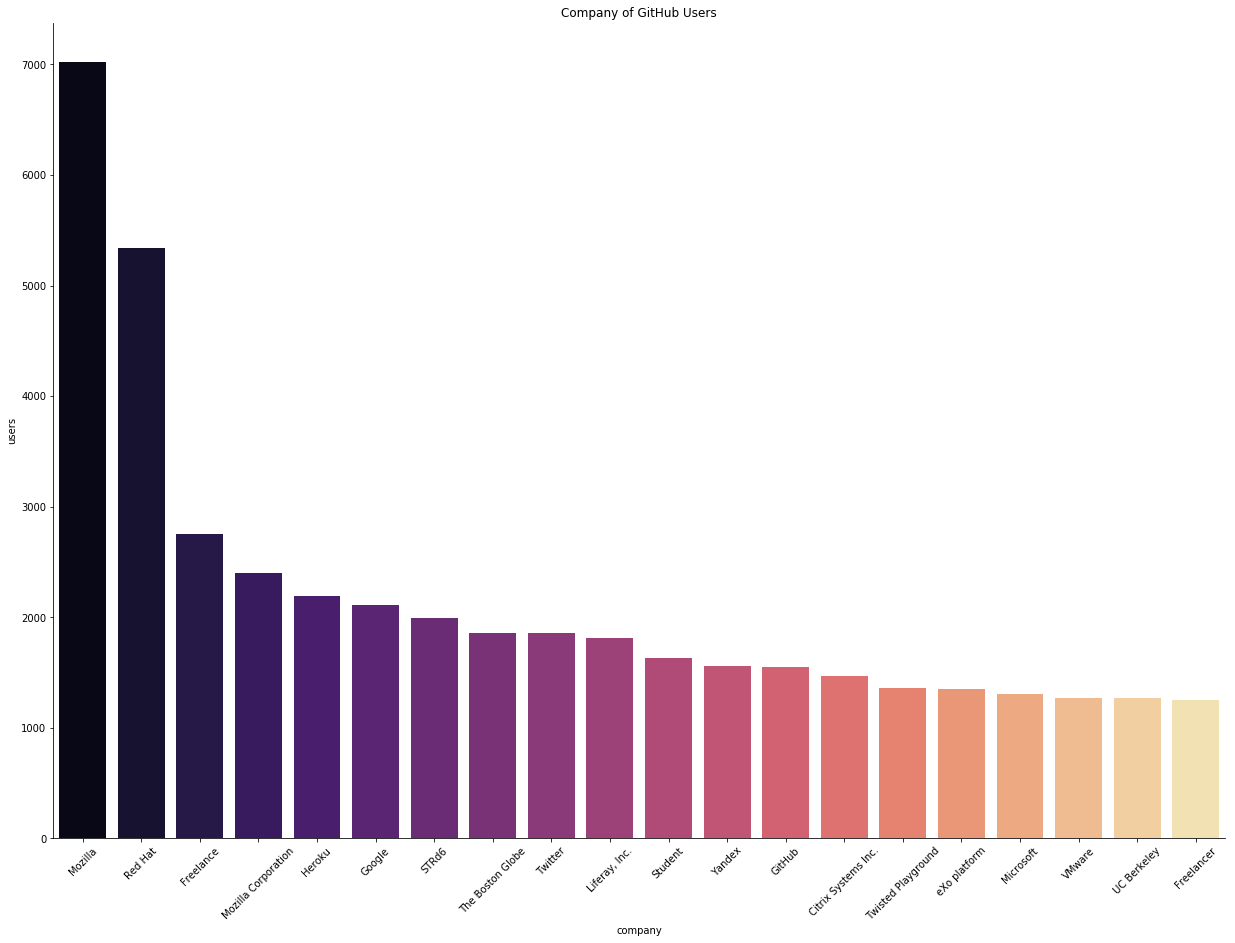

In [12]:
f, ax = plt.subplots(figsize = (21, 15))
sns.despine(f)
sns.barplot(x = 'company', y = 'users', data = github_head, palette = 'magma').set_title('Company of GitHub Users')
plt.xticks(rotation = 45)